<a href="https://colab.research.google.com/github/prausela/nutri-stats/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nutrition Statistics

<a target="_blank" href="https://colab.research.google.com/github/prausela/nutri-stats/blob/main/main.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Import libraries

In [4]:
#pip install nbformat

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go

## Read Excel File

In [6]:
df = pd.read_excel("Datos trabajo 1.xls")
df

,Grasas_sat,Alcohol,Calorías,Sexo
0,14.60,0.03,910,F
1,11.82,0.05,1026,F
2,16.98,0.14,1033,F
3,14.04,0.38,1098,F
4,15.30,0.38,1122,F
...,...,...,...,...
168,46.36,32.64,2285,M
169,39.30,32.72,2300,M
170,34.14,37.28,2333,M
171,999.99,37.90,2334,M


## Column Names

In [7]:
SAT_FAT = "Grasas_sat"
ALCOHOL = "Alcohol"
CAL     = "Calorías"
SEX     = "Sexo"

## Rows Missing Values
1. Reemplace los datos faltantes.

In [8]:
MISSING_VAL = 999.99

In [9]:
rows_with_val           = lambda val, df : df[df.eq(val).any(axis=1)]
rows_with_missing_val   = lambda df      : rows_with_val(MISSING_VAL, df)

In [10]:
mv_df = rows_with_missing_val(df)
mv_df

,Grasas_sat,Alcohol,Calorías,Sexo
21,36.31,999.99,1000,F
24,41.01,999.99,800,F
162,27.08,999.99,2054,M
171,999.99,37.90,2334,M


In [11]:
df

,Grasas_sat,Alcohol,Calorías,Sexo
0,14.60,0.03,910,F
1,11.82,0.05,1026,F
2,16.98,0.14,1033,F
3,14.04,0.38,1098,F
4,15.30,0.38,1122,F
...,...,...,...,...
168,46.36,32.64,2285,M
169,39.30,32.72,2300,M
170,34.14,37.28,2333,M
171,999.99,37.90,2334,M


In [12]:
nm_df = df.drop(mv_df.index)
nm_df

,Grasas_sat,Alcohol,Calorías,Sexo
0,14.60,0.03,910,F
1,11.82,0.05,1026,F
2,16.98,0.14,1033,F
3,14.04,0.38,1098,F
4,15.30,0.38,1122,F
...,...,...,...,...
167,45.31,31.26,2260,M
168,46.36,32.64,2285,M
169,39.30,32.72,2300,M
170,34.14,37.28,2333,M


In [13]:
rows_with_missing_val(nm_df)

,Grasas_sat,Alcohol,Calorías,Sexo


## Numeric Variables
2. a. Describa las principales caracterısticas que presentan los datos.

In [14]:
nm_df[[SAT_FAT, ALCOHOL, CAL]].mean()

Grasas_sat      24.596331
Alcohol          8.660000
Calorías      1585.443787
dtype: float64

In [15]:
nm_df[[SAT_FAT, ALCOHOL, CAL]].std()

Grasas_sat      6.405481
Alcohol         8.942674
Calorías      291.439242
dtype: float64

## Boxplots
2. b. Realizar gráficos boxplots. En todos los casos debe comentar los resultados.

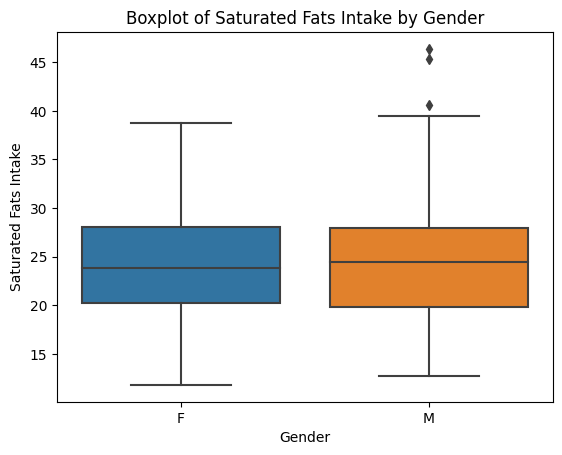

In [21]:
plt.figure()
sns.boxplot(x='Sexo', y='Grasas_sat', data=nm_df)
plt.title('Boxplot of Saturated Fats Intake by Gender')
plt.xlabel('Gender')
plt.ylabel('Saturated Fats Intake')
plt.show()

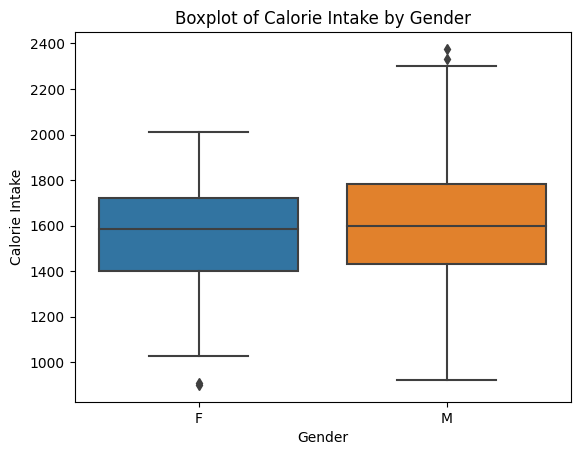

In [22]:
plt.figure()
sns.boxplot(x='Sexo', y='Calorías', data=nm_df)
plt.title('Boxplot of Calorie Intake by Gender')
plt.xlabel('Gender')
plt.ylabel('Calorie Intake')
plt.show()

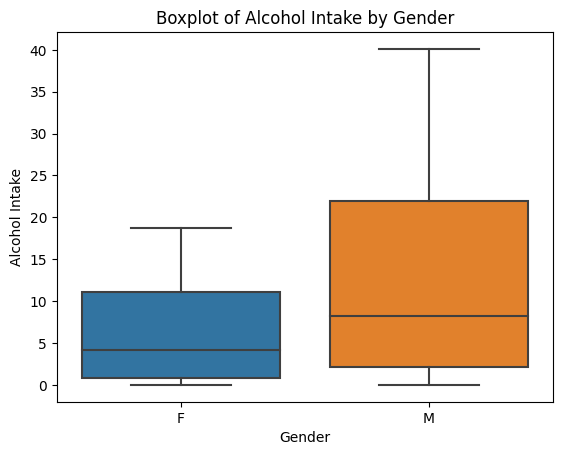

In [23]:
plt.figure()
sns.boxplot(x='Sexo', y='Alcohol', data=nm_df)
plt.title('Boxplot of Alcohol Intake by Gender')
plt.xlabel('Gender')
plt.ylabel('Alcohol Intake')
plt.show()

## Scatter plots
3. Analice los datos para la variables Grasas sat, Alcohol y Calorıas de acuerdo a la variable categorica Sexo. Comentar los resultados

Text(0, 0.5, 'Alcohol')

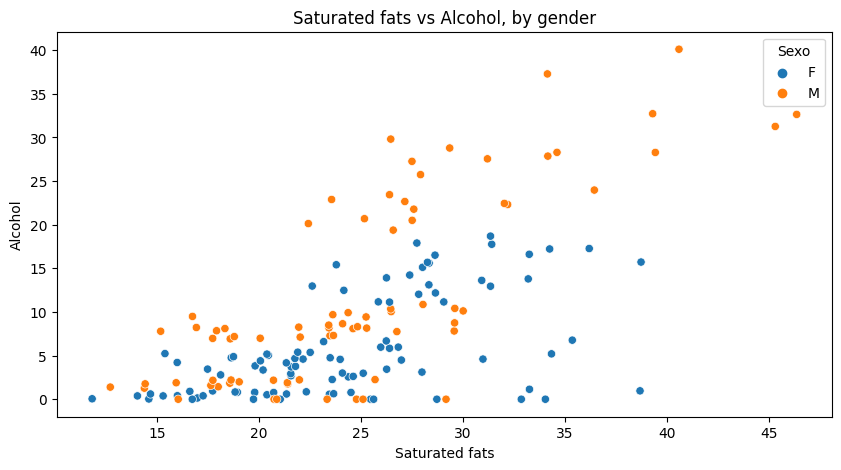

In [16]:
plt.figure(figsize=(10,5))
fig = sns.scatterplot(data=nm_df, x="Grasas_sat", y="Alcohol", hue="Sexo")
plt.title('Saturated fats vs Alcohol, by gender')
plt.xlabel('Saturated fats')
plt.ylabel('Alcohol')

Text(0, 0.5, 'Alcohol')

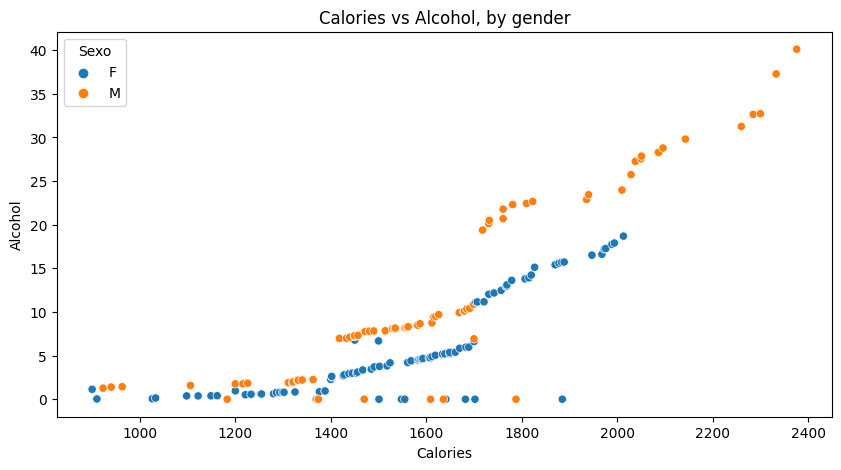

In [17]:
plt.figure(figsize=(10,5))
fig = sns.scatterplot(data=nm_df, x="Calorías", y="Alcohol", hue="Sexo")
plt.title('Calories vs Alcohol, by gender')
plt.xlabel('Calories')
plt.ylabel('Alcohol')

Text(0, 0.5, 'Saturated fats')

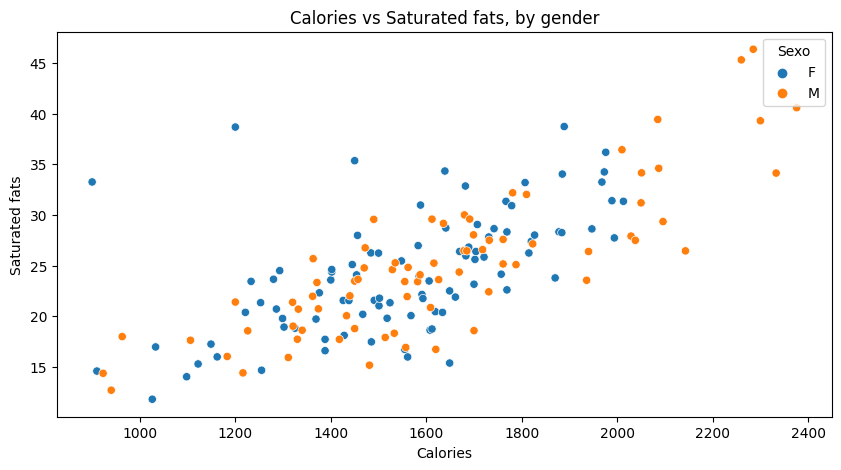

In [18]:
plt.figure(figsize=(10,5))
fig = sns.scatterplot(data=nm_df, x="Calorías", y="Grasas_sat", hue="Sexo")
plt.title('Calories vs Saturated fats, by gender')
plt.xlabel('Calories')
plt.ylabel('Saturated fats')

In [19]:
fem_df = nm_df[nm_df['Sexo'] == "F"]
masc_df = nm_df[nm_df['Sexo'] == "M"]

In [20]:
x1 = fem_df["Calorías"]
y1 = fem_df["Grasas_sat"]
z1 = fem_df["Alcohol"]

x2 = masc_df["Calorías"]
y2 = masc_df["Grasas_sat"]
z2 = masc_df["Alcohol"]

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=x1, y=y1, z=z1, mode='markers', name="F"))
fig.add_trace(go.Scatter3d(x=x2, y=y2, z=z2, mode='markers', name="M"))
fig.update_layout(scene = dict(
  xaxis_title="Calories",
  yaxis_title="Saturated fats",
  zaxis_title="Alcohol"),
  title="Calories vs Saturated fats vs Alcohol, by gender",
  legend_title="Gender",
  width=800,
  margin=dict(r=10, b=10, l=10, t=60)
  )

fig.show()

## Alcohol Intake by Calories
4. Analice la variable Alcohol de acuerdo a la cantidad de calorıas consumidas, tomando 3 categorıas para la variable Calorıas: CATE 1:1100 o menos calorıas consumidas, CATE 2: mas de 1100 hasta 1700 calorıas consumidas, CATE 3: mas de 1700 calorıas consumidas.

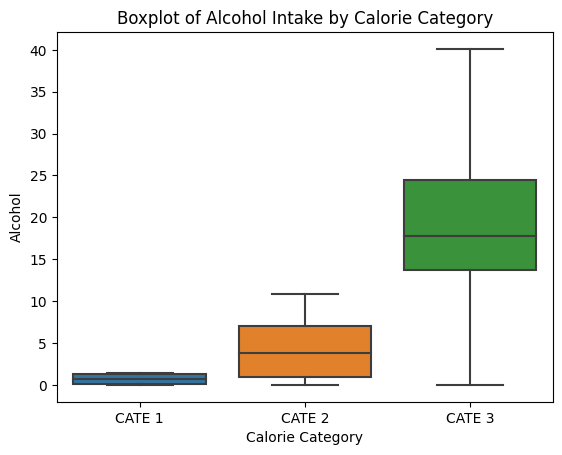

In [24]:
nm_df['Calories_Category'] = pd.cut(nm_df['Calorías'], bins=[0, 1100, 1700, float('inf')], labels=['CATE 1', 'CATE 2', 'CATE 3'])
plt.figure()
sns.boxplot(x='Calories_Category', y='Alcohol', data=nm_df)
plt.title('Boxplot of Alcohol Intake by Calorie Category')
plt.xlabel('Calorie Category')
plt.ylabel('Alcohol')
plt.show()


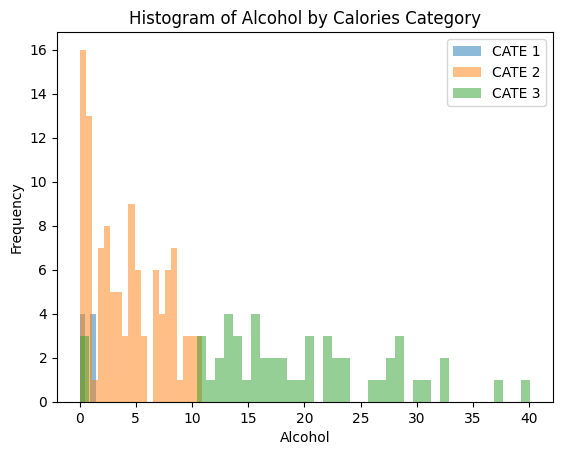

In [25]:
plt.hist(nm_df[nm_df['Calories_Category'] == 'CATE 1']['Alcohol'], bins=3, alpha=0.5, label='CATE 1')
plt.hist(nm_df[nm_df['Calories_Category'] == 'CATE 2']['Alcohol'], bins=20, alpha=0.5, label='CATE 2')
plt.hist(nm_df[nm_df['Calories_Category'] == 'CATE 3']['Alcohol'], bins=50, alpha=0.5, label='CATE 3')


plt.title('Histogram of Alcohol by Calories Category')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.legend()
plt.show()

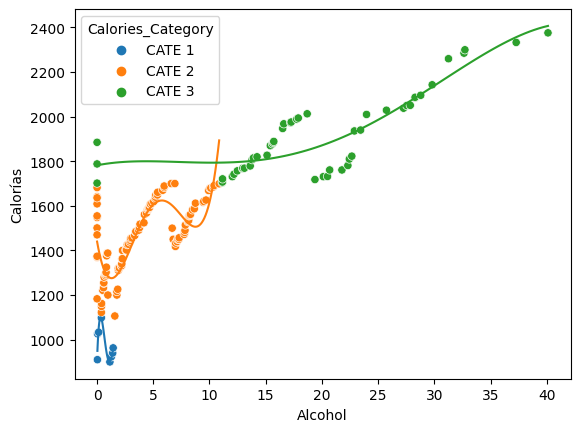

In [26]:
plt.figure()
sns.scatterplot(x='Alcohol', y='Calorías', hue='Calories_Category', data=nm_df)

for category in nm_df['Calories_Category'].unique():
    subset = nm_df[nm_df['Calories_Category'] == category]
    coeffs = np.polyfit(subset['Alcohol'], subset['Calorías'], deg=4)
    poly = np.poly1d(coeffs)
    x_range = np.linspace(subset['Alcohol'].min(), subset['Alcohol'].max(), 100)
    plt.plot(x_range, poly(x_range), label=f'{category} Fit')


# subset1 = nm_df[nm_df['Calories_Category'] == 'CATE 1']
# m, b = np.polyfit(subset1['Alcohol'], subset1['Calorías'], 1)
# plt.plot(subset1['Alcohol'], m*subset1['Alcohol']+b)